In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import genfromtxt
I,Phi1,Phi2=genfromtxt("magnet.csv",delimiter=";",skip_header=1).T
len(Phi1)

11

In [3]:
sPhi0=0.1
Sn=7.2
B1=Phi1/Sn
B2=Phi2/Sn
sB0=sPhi0/Sn
sI=0.001
B=(B1+B2)/2
sB=sqrt((B1-B2)**2/4+sB0**2)
Bs=B*B
sBs=2*B*sB

<Container object of 3 artists>

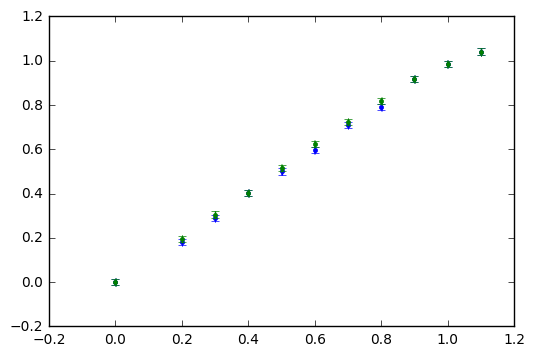

In [4]:
errorbar(I,B1,xerr=sI,yerr=sB0,fmt=".")
errorbar(I,B2,xerr=sI,yerr=sB0,fmt=".")

In [5]:
data=genfromtxt("Al.csv",delimiter=";",skip_header=1)
mAl=data[:,1:]
len(mAl)

11

In [6]:
sm=1e-4
g=9.8
PAl=g*(mean(mAl,axis=1)-mean(mAl,axis=1)[0])
sPAl=g*sqrt(1.5*std(mAl,axis=1)**2+sm**2)

In [7]:
def olsim(x,y,sx,sy):
	a=0
	for i in range(3):
		w=1/(sy**2+(a*sx)**2)
		Sw=sum(w)
		ax=sum(x*w)/Sw
		ay=sum(y*w)/Sw
		axy=sum(x*y*w)/Sw
		ax2=sum((x**2+sx**2)*w)/Sw
		ay2=sum((y**2+sy**2)*w)/Sw
		a=(axy-ax*ay)/(ax2-ax*ax)
	b=(ax2*ay-ax*axy)/(ax2-ax*ax)
	n=len(x)
	chi2=sum((y-a*x-b)**2/(sy**2+(a*sx)**2))
	s02=n/(n-2)*(ay2-ay*ay-(axy-ax*ay)*(axy-ax*ay)/(ax2-ax*ax))
	sa2=s02/n/(ax2-ax*ax)
	sb2=sa2*ax2
	sa=sqrt(sa2)
	sb=sqrt(sb2)
	return a,b,sa,sb,chi2

0.67110559943 0.0173817722945 0.0209850322494 0.00838286017245 14.8547200499


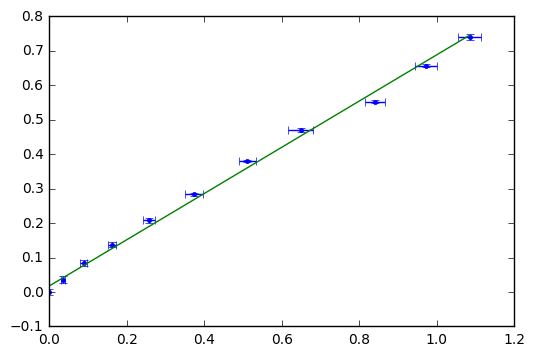

In [8]:
errorbar(Bs,PAl,xerr=sBs,yerr=sPAl,fmt=".")
aAl,bAl,saAl,sbAl,chi2Al=olsim(Bs,PAl,sBs,sPAl)
print(aAl,bAl,saAl,sbAl,chi2Al)
plot(Bs,Bs*aAl+bAl)

In [9]:
d=1e-2
sd=1e-4
s=pi*d**2/4
mu0=pi*4e-7
xiAl=2*mu0/s*aAl*1e-3
sxiAl=abs(xiAl)*sqrt((2*sd/d)**2+(saAl/aAl)**2)
print(xiAl,sxiAl)

2.14753791818e-05 7.97130642237e-07


In [10]:
data=genfromtxt("Cu.csv",delimiter=";",skip_header=1)
mCu=data[:,1:]
len(mCu)

11

In [11]:
PCu=g*(mean(mCu,axis=1)-mean(mCu,axis=1)[0])
sPCu=g*sqrt(1.5*std(mCu,axis=1)**2+sm**2)

-0.209714490773 0.00321355564052 0.00698642176027 0.00203995095137 16.2315315722


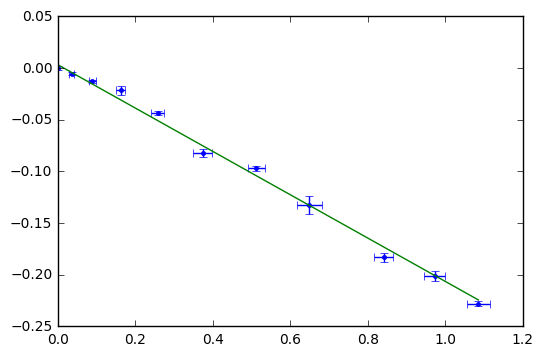

In [12]:
errorbar(Bs,PCu,xerr=sBs,yerr=sPCu,fmt=".")
aCu,bCu,saCu,sbCu,chi2Cu=olsim(Bs,PCu,sBs,sPCu)
print(aCu,bCu,saCu,sbCu,chi2Cu)
plot(Bs,Bs*aCu+bCu)

In [13]:
xiCu=2*mu0/s*aCu*1e-3
sxiCu=abs(xiCu)*sqrt((2*sd/d)**2+(saCu/aCu)**2)
print(xiCu,sxiCu)

-6.71086370474e-06 2.60760057935e-07


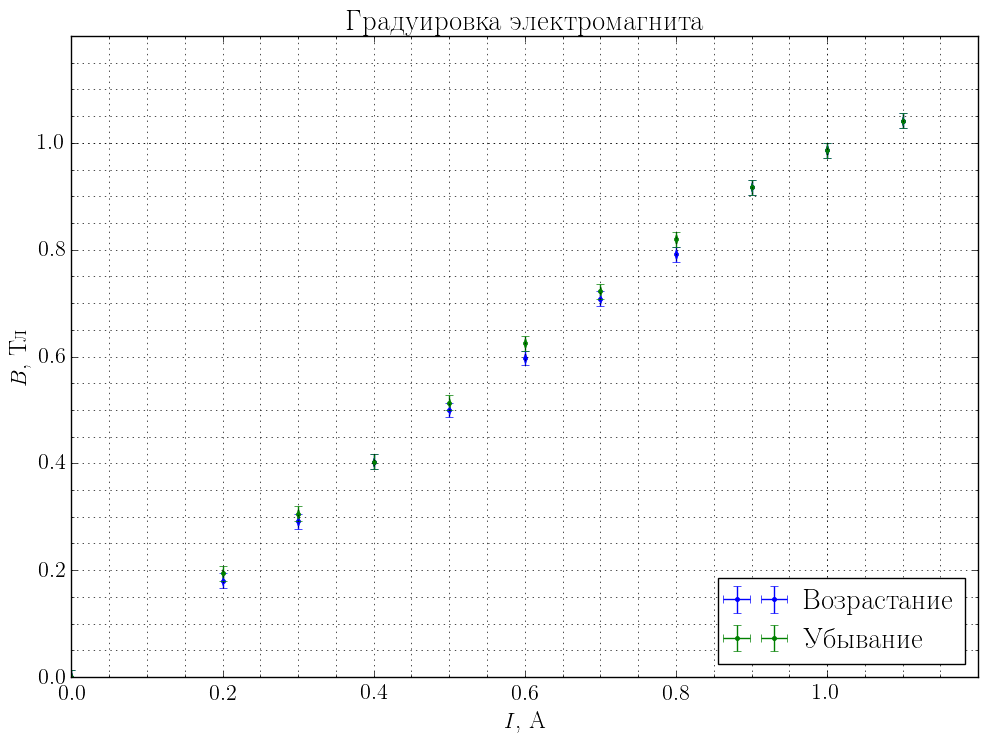

In [14]:
#from matplotlib import rc
rc('figure', figsize=(11.7,8.27))
rc('font', size=16)
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
rc('text.latex', preamble=r"\usepackage[T2A]{fontenc}")
rc('text.latex', preamble=r"\usepackage[russian]{babel}")
errorbar(I,B1,xerr=sI,yerr=sB0,fmt=".",label="Возрастание")
errorbar(I,B2,xerr=sI,yerr=sB0,fmt=".",label="Убывание")
axis((0,1.2,0,1.2))
minorticks_on()
grid(which='both')
title("Градуировка электромагнита")
xlabel(r"$I$, А")
ylabel(r"$B$, Тл")
legend(loc='lower right')
savefig("graph0.pdf")

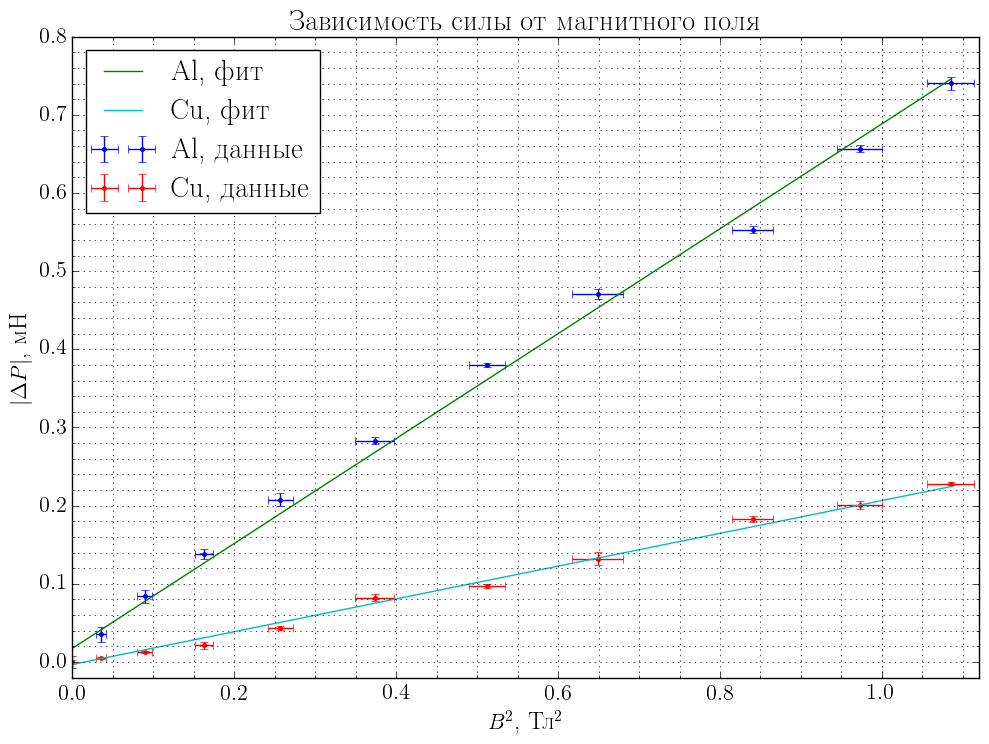

In [17]:
errorbar(Bs,PAl,xerr=sBs,yerr=sPAl,fmt=".",label="Al, данные")
plot(Bs,Bs*aAl+bAl,label="Al, фит")
errorbar(Bs,-PCu,xerr=sBs,yerr=sPCu,fmt=".",label="Cu, данные")
plot(Bs,-Bs*aCu-bCu,label="Cu, фит")
axis((0,1.12,-0.02,0.8))
minorticks_on()
grid(which='both')
title("Зависимость силы от магнитного поля")
ylabel(r"$| \Delta P |$, мН")
xlabel(r"$B^2$, Тл$^2$")
legend(loc='upper left')
savefig("graph1.pdf")